#Importing Libraraires


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
import seaborn as sns
import io
import sklearn

#Loading Dtat Sets

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving Proj2_Train.csv to Proj2_Train.csv


In [ ]:
from google.colab import files
data_to_load1 = files.upload()

Saving Proj2_Test.csv to Proj2_Test.csv


In [ ]:
df_train = pd.read_csv(io.BytesIO(data_to_load['Proj2_Train.csv']))
df_train.head()

,Sl No,Sample ID,Age,Ob_Score,BMI,Consistency_Score,Position_Score,Effacement_Score,Dialation_Score,Station_Score,Total_Bishop_Score,Cerv_Len_cms,Cerv_Wid_cms,Induction,Del_mode,Unnamed: 15
0,1,DT1,20,G1,28.255713,2,0,0,1,0,3,NaN,NaN,1,1,NaN
1,2,DT2,21,G1,29.772191,2,0,1,1,0,4,NaN,NaN,1,1,NaN
2,3,DT3,21,G1,28.511248,2,0,1,1,0,4,NaN,NaN,1,1,NaN
3,4,DT4,22,G1,28.772695,2,0,1,1,0,4,NaN,NaN,1,1,NaN
4,5,DT5,22,G1,27.488918,2,0,0,1,0,3,NaN,NaN,1,1,NaN


In [ ]:
df_test = pd.read_csv(io.BytesIO(data_to_load1['Proj2_Test.csv']))
df_test.head()

,Sl No,Sample ID,Age,Ob_Score,BMI,Consistency_Score,Position_Score,Effacement_Score,Dialation_Score,Station_Score,Total_Bishop_Score,Cerv_Len_cms,Cerv_Wid_cms,Induction,Del_mode
0,1,D1,21,G1,30.4,2,0,1,1,0,4,NaN,NaN,1,1
1,2,D2,24,G1,23.5,2,1,1,1,0,5,NaN,NaN,1,0
2,3,D3,23,G1,25.7,2,0,0,1,0,3,NaN,NaN,1,1
3,4,D4,20,G1,27.6,2,0,1,1,0,5,NaN,NaN,1,0
4,5,D5,25,G1,27.4,2,0,0,1,0,3,NaN,NaN,1,0


In [ ]:
df = pd.concat([df_train,df_test])

#Data PreProcessing

*checking the shape and size*

In [ ]:
df.shape,df_test.shape

((1100, 16), (100, 15))

**First we will take only train data**

*To see the Null values*


In [ ]:
df.isnull().sum()

Sl No                    0
Sample ID                0
Age                      0
Ob_Score                 0
BMI                      0
Consistency_Score        0
Position_Score           0
Effacement_Score         0
Dialation_Score          0
Station_Score            0
Total_Bishop_Score       0
Cerv_Len_cms           660
Cerv_Wid_cms           660
Induction                0
Del_mode                 0
Unnamed: 15           1100
dtype: int64

Now checking teh Info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sl No               1100 non-null   int64  
 1   Sample ID           1100 non-null   object 
 2   Age                 1100 non-null   int64  
 3   Ob_Score            1100 non-null   object 
 4   BMI                 1100 non-null   float64
 5   Consistency_Score   1100 non-null   int64  
 6   Position_Score      1100 non-null   int64  
 7   Effacement_Score    1100 non-null   int64  
 8   Dialation_Score     1100 non-null   int64  
 9   Station_Score       1100 non-null   int64  
 10  Total_Bishop_Score  1100 non-null   int64  
 11  Cerv_Len_cms        440 non-null    float64
 12  Cerv_Wid_cms        440 non-null    float64
 13  Induction           1100 non-null   int64  
 14  Del_mode            1100 non-null   int64  
 15  Unnamed: 15         0 non-null      float64
dtypes: float

Lets check the description of the data

In [ ]:
df.describe()

,Sl No,Age,BMI,Consistency_Score,Position_Score,Effacement_Score,Dialation_Score,Station_Score,Total_Bishop_Score,Cerv_Len_cms,Cerv_Wid_cms,Induction,Del_mode,Unnamed: 15
count,1100.000000,1100.000000,1100.000000,1100.0,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,440.000000,440.000000,1100.000000,1100.000000,0.0
mean,459.590909,23.057273,26.667627,2.0,0.509091,0.428182,0.471818,0.240000,3.656364,2.463176,1.479866,0.940000,0.320000,NaN
std,304.389581,2.318457,2.530535,0.0,0.500145,0.505949,0.499432,0.435712,1.124670,0.380269,0.506703,0.237595,0.466688,NaN
min,1.000000,18.000000,19.800000,2.0,0.000000,0.000000,0.000000,0.000000,2.000000,1.480000,0.170000,0.000000,0.000000,NaN
25%,175.750000,21.000000,24.861333,2.0,0.000000,0.000000,0.000000,0.000000,3.000000,2.193789,1.097355,1.000000,0.000000,NaN
50%,450.500000,23.000000,26.600000,2.0,1.000000,0.000000,0.000000,0.000000,4.000000,2.455348,1.512157,1.000000,0.000000,NaN
75%,725.250000,25.000000,28.619754,2.0,1.000000,1.000000,1.000000,0.000000,4.000000,2.685966,1.893930,1.000000,1.000000,NaN
max,1000.000000,32.000000,32.900000,2.0,1.000000,2.000000,1.000000,2.000000,7.000000,3.580000,2.570000,1.000000,1.000000,NaN


Now we will drop the Un-necessary Features( with almost zero Or no variance)

In [ ]:
df.head()

,Sl No,Sample ID,Age,Ob_Score,BMI,Consistency_Score,Position_Score,Effacement_Score,Dialation_Score,Station_Score,Total_Bishop_Score,Cerv_Len_cms,Cerv_Wid_cms,Induction,Del_mode,Unnamed: 15
0,1,DT1,20,G1,28.255713,2,0,0,1,0,3,NaN,NaN,1,1,NaN
1,2,DT2,21,G1,29.772191,2,0,1,1,0,4,NaN,NaN,1,1,NaN
2,3,DT3,21,G1,28.511248,2,0,1,1,0,4,NaN,NaN,1,1,NaN
3,4,DT4,22,G1,28.772695,2,0,1,1,0,4,NaN,NaN,1,1,NaN
4,5,DT5,22,G1,27.488918,2,0,0,1,0,3,NaN,NaN,1,1,NaN


`**checking the target variable**`

In [ ]:
#for prevent warning , we have to run following codes 
import warnings
warnings.filterwarnings('ignore')

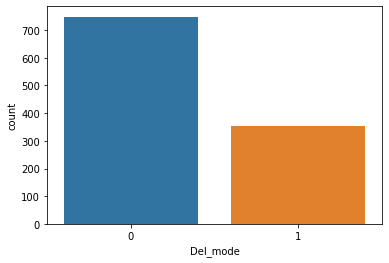

In [ ]:
sns.countplot(df['Del_mode'])

In [ ]:
df['Del_mode'].value_counts(0)

0    748
1    352
Name: Del_mode, dtype: int64

In [ ]:
df['Ob_Score'].unique()

array(['G1', 'G2A1', 'G3A2'], dtype=object)

**Here we can clearly  see Class Imbalance in the target variable . so, we have to fix this **

#Encoding

 As we have a feature("	Ob_Score") with object class so, we have to **Encode** that feature  

In [ ]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 775 kB/s 


In [ ]:
import category_encoders as ce

In [ ]:
df1 = pd.get_dummies(data = df,prefix='Ob_Score',columns =['Ob_Score'],drop_first=False)
df1.head()

,Sl No,Sample ID,Age,BMI,Consistency_Score,Position_Score,Effacement_Score,Dialation_Score,Station_Score,Total_Bishop_Score,Cerv_Len_cms,Cerv_Wid_cms,Induction,Del_mode,Unnamed: 15,Ob_Score_G1,Ob_Score_G2A1,Ob_Score_G3A2
0,1,DT1,20,28.255713,2,0,0,1,0,3,NaN,NaN,1,1,NaN,1,0,0
1,2,DT2,21,29.772191,2,0,1,1,0,4,NaN,NaN,1,1,NaN,1,0,0
2,3,DT3,21,28.511248,2,0,1,1,0,4,NaN,NaN,1,1,NaN,1,0,0
3,4,DT4,22,28.772695,2,0,1,1,0,4,NaN,NaN,1,1,NaN,1,0,0
4,5,DT5,22,27.488918,2,0,0,1,0,3,NaN,NaN,1,1,NaN,1,0,0


In [ ]:
#encode = ce.BinaryEncoder(cols= ['Ob_Score'], return_df=True)
#df1 = encode.fit(df) 
#df1

In [ ]:
#from sklearn.preprocessing import OneHotEncoder
#ohe = OneHotEncoder(categories = 'auto',drop = None, sparse = False) 
#df1 = pd.DataFrame(ohe.fit_transform(df[['Ob_Score']]))
#df1.head()

In [ ]:
df1['Ob_Score_G3A2'].unique()

array([0, 1], dtype=uint8)

In [ ]:
df1.shape

(1100, 18)

In [ ]:
df1.isnull().sum()

Sl No                    0
Sample ID                0
Age                      0
BMI                      0
Consistency_Score        0
Position_Score           0
Effacement_Score         0
Dialation_Score          0
Station_Score            0
Total_Bishop_Score       0
Cerv_Len_cms           660
Cerv_Wid_cms           660
Induction                0
Del_mode                 0
Unnamed: 15           1100
Ob_Score_G1              0
Ob_Score_G2A1            0
Ob_Score_G3A2            0
dtype: int64

In [ ]:
df1

,Age,BMI,Position_Score,Effacement_Score,Dialation_Score,Station_Score,Total_Bishop_Score,Cerv_Len_cms,Cerv_Wid_cms,Induction,Del_mode,Unnamed: 15,Ob_Score_G1,Ob_Score_G2A1,Ob_Score_G3A2
0,20,28.255713,0,0,1,0,3,NaN,NaN,1,1,NaN,1,0,0
1,21,29.772191,0,1,1,0,4,NaN,NaN,1,1,NaN,1,0,0
2,21,28.511248,0,1,1,0,4,NaN,NaN,1,1,NaN,1,0,0
3,22,28.772695,0,1,1,0,4,NaN,NaN,1,1,NaN,1,0,0
4,22,27.488918,0,0,1,0,3,NaN,NaN,1,1,NaN,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,25,29.500000,0,0,0,1,3,2.33,0.90,1,0,NaN,1,0,0
96,22,29.600000,0,0,1,0,3,2.23,1.63,1,0,NaN,1,0,0
97,28,31.000000,1,0,0,0,4,2.64,1.08,1,0,NaN,1,0,0
98,30,32.300000,0,0,0,1,3,2.11,1.90,1,0,NaN,1,0,0


In [ ]:
df1 = df1.drop(['Unnamed: 15'],axis = 1)


#WE will fix the missing values

`**Using knn imputer**`

In [ ]:
from sklearn.impute import KNNImputer
impute = KNNImputer(n_neighbors=5)
df2 = pd.DataFrame(impute.fit_transform(df1), columns = df1.columns)
df2.head()

,Age,BMI,Position_Score,Effacement_Score,Dialation_Score,Station_Score,Total_Bishop_Score,Cerv_Len_cms,Cerv_Wid_cms,Induction,Del_mode,Ob_Score_G1,Ob_Score_G2A1,Ob_Score_G3A2
0,20.0,28.255713,0.0,0.0,1.0,0.0,3.0,2.463081,1.290270,1.0,1.0,1.0,0.0,0.0
1,21.0,29.772191,0.0,1.0,1.0,0.0,4.0,2.181772,1.637600,1.0,1.0,1.0,0.0,0.0
2,21.0,28.511248,0.0,1.0,1.0,0.0,4.0,2.041794,2.230715,1.0,1.0,1.0,0.0,0.0
3,22.0,28.772695,0.0,1.0,1.0,0.0,4.0,2.136196,1.984797,1.0,1.0,1.0,0.0,0.0
4,22.0,27.488918,0.0,0.0,1.0,0.0,3.0,2.558874,0.626686,1.0,1.0,1.0,0.0,0.0


In [ ]:
df2.isnull().sum()

Age                   0
BMI                   0
Position_Score        0
Effacement_Score      0
Dialation_Score       0
Station_Score         0
Total_Bishop_Score    0
Cerv_Len_cms          0
Cerv_Wid_cms          0
Induction             0
Del_mode              0
Ob_Score_G1           0
Ob_Score_G2A1         0
Ob_Score_G3A2         0
dtype: int64

#Handling the Outlier

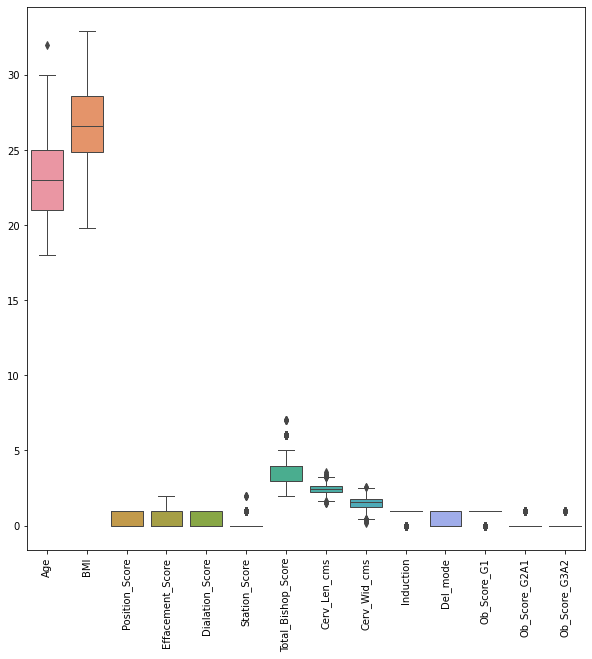

In [ ]:
#checking the Outliers
fig = plt.figure(figsize=(10,10))
sns.boxplot(data = df2, linewidth = 1)
plt.xticks(rotation  ='vertical')
plt.show()

In [ ]:
df2['Position_Score'].unique()

array([0., 1.])

In [ ]:
df2['Station_Score'].unique()

array([0., 1., 2.])

In [ ]:
df2['Effacement_Score'].unique()

array([0., 1., 2.])

In [ ]:
df2['Total_Bishop_Score'].unique()

array([3., 4., 2., 5., 6., 7.])

In [ ]:
df2['Age'].unique()

array([20., 21., 22., 23., 24., 25., 26., 19., 18., 27., 28., 30., 29.,
       32.])

`**So, there is no need of removing outliers as most of the data feature is in a definite range**`

In [ ]:
#def outliers(df3,ft):
 #q1 = df3[ft].quantile(0.25)
 #q2 = df3[ft].quantile(0.75)

  #iqr = q2-q1

  #lower = q1-1.5*iqr
  #upper = q2+1.5*iqr
#
 # rs = df2.index[(df3[ft]<lower)|(df3[ft]>upper)]
  #return rs

In [ ]:
#def remove(df3,rs):
 # rs = sorted(set(rs))
  #df3 = df2.drop(rs)
 # return df3

In [ ]:
#index_list = []
#for feature in[ 'Age',  #not considering Ob_Score_G2A1 and Ob_Score_G3A2 as they do not have outliers only two values(0,1)
# 'BMI',
# 'Position_Score',
 #'Dialation_Score',
 'Station_Score',
 'Total_Bishop_Score',
 'Cerv_Len_cms',
 'Cerv_Wid_cms',
 'Induction',
 #'Del_mode']:
 #index_list.extend(outliers(df2,feature))

In [ ]:
#df3 = remove(df2,index_list)

In [ ]:
#df3['Ob_Score_G3A2'].unique()

#Feature Selection

`**Using Chi-square**`

In [ ]:
#Select K best

X=df2.drop("Del_mode",axis=1)
Y=df2['Del_mode']

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

Select_KBest_rank_features=SelectKBest(score_func=chi2,k=5)
KBest_features=Select_KBest_rank_features.fit(X,Y)

df_Kscores=pd.DataFrame(KBest_features.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)

kbest_features_rank=pd.concat([dfcolumns,df_Kscores],axis=1)

kbest_features_rank.columns=['Features','K_score']
kbest_features_rank

print(kbest_features_rank.nlargest(6,'K_score'))

              Features    K_score
2       Position_Score  42.778690
11       Ob_Score_G2A1  37.387868
6   Total_Bishop_Score  17.297833
8         Cerv_Wid_cms  12.160313
12       Ob_Score_G3A2  10.352941
3     Effacement_Score   9.207943


`**Checking MultiColineariry**`

In [ ]:
V=[]
from statsmodels.stats.outliers_influence import variance_inflation_factor
for j in range(X.shape[1]):
  V.append(variance_inflation_factor(X.values,j))
print(V)

np.transpose(V)
pd.DataFrame(X.columns)
pd.DataFrame(np.transpose(V))
pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(V))], axis =1)

[1.384336870439473, 1.2213917777383445, 2.151436478346473, 2.4595197796012664, 2.178766527732, 1.7928009018161961, 7.0036545813253435, 2.1390739166527344, 1.2462430114044454, 1.240757638961084, 365.80819266615254, 17.250727740279856, 8.838561100826588]


,0,0
0,Age,1.384337
1,BMI,1.221392
2,Position_Score,2.151436
3,Effacement_Score,2.459520
4,Dialation_Score,2.178767
5,Station_Score,1.792801
6,Total_Bishop_Score,7.003655
7,Cerv_Len_cms,2.139074
8,Cerv_Wid_cms,1.246243
9,Induction,1.240758


**` Selecting features`**
 
 



We can use below features for our analysis: Age,BMI,Position_Score,Cerv_Len_cms, Cerv_Wid_cms,Effacement_Score,Dialation_Score,Total_Bishop_Score

In [ ]:
#drop the unwanted columns
x=X[['Age','BMI','Position_Score','Cerv_Len_cms','Cerv_Wid_cms','Effacement_Score','Dialation_Score','Total_Bishop_Score']]


In [ ]:
y=pd.DataFrame(Y)
y

,Del_mode
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
1095,0.0
1096,0.0
1097,0.0
1098,0.0


# _Scaling the data_

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.RobustScaler()
x_scale = scaler.fit_transform(x)

#Balancing the classes

`***We will use 'SMOTE' method to balance the class***`

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote,y_smote = smote.fit_resample(x,y)

In [ ]:
y.value_counts()

Del_mode
0.0         748
1.0         352
dtype: int64



 
 

`**Splitting the data**`
 
 
 



 
 



In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=40,test_size=0.25)

#Applying Different Algorithms

`**Logistic Regression**`

---

 
 


In [ ]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()
lgr.fit(x_train,y_train)
y_pred = lgr.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[178  19]
 [ 40  38]]
0.7854545454545454
              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86       197
         1.0       0.67      0.49      0.56        78

    accuracy                           0.79       275
   macro avg       0.74      0.70      0.71       275
weighted avg       0.77      0.79      0.77       275



`**Random Forest**`

---



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_features = 0.2, n_estimators = 34)
rf.fit(x_train,y_train)
y_pred_rf= rf.predict(x_test)


print(confusion_matrix(y_test,y_pred_rf))
print(accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

[[193   4]
 [  9  69]]
0.9527272727272728
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       197
         1.0       0.95      0.88      0.91        78

    accuracy                           0.95       275
   macro avg       0.95      0.93      0.94       275
weighted avg       0.95      0.95      0.95       275



`**KNN Classifier**`

---



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2) #p=2 Euclidean Distance
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

print(confusion_matrix(y_test,y_pred_knn))
print(accuracy_score(y_test,y_pred_knn))
print(classification_report(y_test,y_pred_knn))

[[191   6]
 [ 12  66]]
0.9345454545454546
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96       197
         1.0       0.92      0.85      0.88        78

    accuracy                           0.93       275
   macro avg       0.93      0.91      0.92       275
weighted avg       0.93      0.93      0.93       275



`**Support Vector Classifier**`

---



In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel = "linear", gamma = "auto")
svm.fit(x_train,y_train)
y_pred_svm = svm.predict(x_test)

print(confusion_matrix(y_test,y_pred_svm))
print(accuracy_score(y_test,y_pred_svm))
print(classification_report(y_test,y_pred_svm))

[[181  16]
 [ 42  36]]
0.7890909090909091
              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86       197
         1.0       0.69      0.46      0.55        78

    accuracy                           0.79       275
   macro avg       0.75      0.69      0.71       275
weighted avg       0.78      0.79      0.77       275



#**So, from the above results we can conclude that the Random Forest Algorithm is the best algorithm /Model for the classification of the Pregnancy Data.**  

---

********************************************************************************